# Metoda spadku gradientu (gradient descent)

Mamy problem optymalizacyjny: szukamy parametru $\theta$, dla którego funkcja $f(\theta)$ przyjmuje wartość najmniejszą.

Algorytm:

Iteracyjnie poprawiamy wartość parametru według wzoru:

$$\theta_{new} = \theta_{old} - learning\_rate * \frac{df}{d\theta}$$

Dlaczego tak?
- gdy funkcja dla danego $\theta$ jest rosnąca, to pochodna jest dodatnia, więc przesumamy się w lewo,
- gdy funkcja dla danego $\theta$ jest malejąca, to pochodna jest ujemna, więc przesumamy się w prawo.

W skrócie: sprawdzamy w którą stronę funkcja maleje i tam się przesywamy - tym dalej im nachylenie większe.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def f(x):
    return(x**2 - 6*x + 12)
    
def grad_f(x):
    return(2*x - 6)


from IPython import display


def visualise_gradient_decsent(f=f,grad_f=grad_f,theta = -2, learning_rate=0.8, sec=3, x = np.linspace(-5,11,100)):

    """
    Funkcja wizualizujaca optymalizacje metoda spadku gradient.
    
    f - definicja funkcji, ktora chcemy zoptymalizowac
    grad_f - definicja jej pochodnej
    theta - punkt startowy
    learning_rate - wspolczynnik uczenia
    sec - dlugosc przerwy pomiedzy wyswietlaniem kolejnych elementow w sekundach
    x - przedzial na ktorym wizualizujemy dzialanie metody
    
    """
    
    y = f(x)
    
    for i in range(100):

        plt.figure(figsize=(10,10))
        plt.plot(x,y,c="blue")
        plt.scatter(theta,0,s=60)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.vlines(x=theta,ymin=0,ymax=f(theta))


        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        theta_new = theta - learning_rate*grad_f(theta)


        plt.arrow(theta, f(theta), 2, 2*grad_f(theta), head_width = 0.3,head_length = 0.3 )

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)


        plt.text(-1,40,"grad = %.3f" % grad_f(theta), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-2,30,"step = -1 *  %.2f * %.2f = " % (learning_rate,grad_f(theta)), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-2,30,"step = -1 *  %.2f * %.2f = %.2f" % (learning_rate,grad_f(theta), -learning_rate*grad_f(theta)), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)



        delta = theta_new - theta

        plt.text(min(theta,theta_new),3,"step = %.3f" % ( -learning_rate*grad_f(theta)), fontsize=20)
        plt.arrow(theta, 0, 0.9*delta, 0, head_width = 1,head_length = np.abs(0.1*delta),color="red" )

        display.clear_output(wait=True)
        display.display(plt.gcf())

        #plt.annotate('', xy=(theta, 10), xytext=(theta_new, 10),
        #                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
        #                   va='center', ha='center')
        theta = theta_new

        plt.vlines(x=theta,ymin=0,ymax=f(theta))
        #plt.show()

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

In [7]:
visualise_gradient_decsent(learning_rate=0.8,sec=0.1)

KeyboardInterrupt: 

In [ ]:
visualise_gradient_decsent(sec=1)

In [ ]:
visualise_gradient_decsent(learning_rate=1,sec=0.5)

In [11]:
def f(x):
    return(0.5*(x**4 - x**3 - 6*x**2 + 30) )

def grad_f(x):
    return(0.5*(4*x**3 - 3*x**2 - 12*x))

visualise_gradient_decsent(f,grad_f,theta=-3,learning_rate=0.1,x=np.linspace(-4,4,300),sec=0.3)

KeyboardInterrupt: 

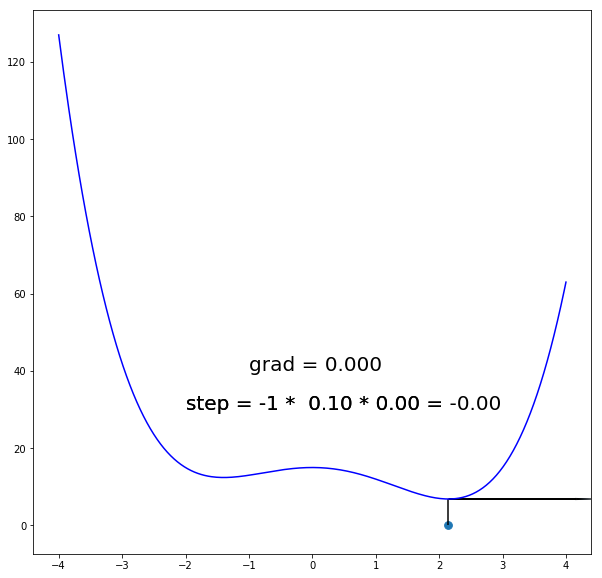

KeyboardInterrupt: 

In [12]:
visualise_gradient_decsent(f,grad_f,theta=-3,learning_rate=0.1,x=np.linspace(-4,4,300),sec=0.3)

Uczenie odbywa się w "epokach" - jedna epoka to aktualizaja wartosci parametru na podstawie całego zbioru obserwacji.

## Gradient decsent:
$$ Cost(\theta) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$
$$\theta_k = \theta_k - learning\_rate * \frac{dCost}{d\theta_k}$$

## Stochastic gradient decsent - SGD:


$$ Cost(\theta) = \frac{1}{r} \sum\limits_{i \in \{ i_1, ..., i_r \}} f(x_i,y_i,\theta),$$ $$ \ \ \text{gdzie} \ \ \{ i_1, ..., i_r \} - \text{losowy podzbiór obserwacji}$$
$$\theta_i = \theta_i - learning\_rate * \frac{df}{d\theta_j}$$
i powtarzamy to wielokrotnie tak, żeby każda obserwacja została wykorzystana jeden raz - w praktyce mieszamy losowo kolejność obserwacji i bierzemy kolejne podzbiory - np. dla "batcha" wielkości 10, uczymy kolejno na obserwacjach od 1 do 10, od 11 do 20, itd.. Przejście po całych danych to jedna *epoka*.

SGD jest domyślnym algorytmem uczenia sieci neuronowych wszelkiego rodzaju.

# Neuron

<img src="Grafika/neuron.jpg" width="500">

Źródło: https://cdn-images-1.medium.com/max/1600/0*l4ohhbrwQ5MGvmGc.jpg

<br>
<br>

<img src="Grafika/perceptron.gif" width="400">
Źródło: http://blog.zabarauskas.com/img/perceptron.gif

$\sigma(\cdot)$ - funkcja aktywacji

## $\sigma(x) = \frac{1}{1+\exp{(x)}}$

W praktyce popularne są trzy funkcje aktywacji:

- sigmoid
- tangens hiperboliczny
- RELU: $relu(x) = \max{(x,0)}$.

# Neuron jako klasyfikator:  Perceptron

In [12]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

class Perceptron(object):

    def __init__(self, eta=0.1, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.w_[0] = -50
        self.w_[1] = 10
        self.w_[2] = 1
        self.errors_ = []
        
        for i in range(self.epochs):
            
            plt.figure(figsize=(5,5))
        
            errors = 0
            for xi, target in zip(X, y):
                
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
                
            plt.scatter(X[:,0],X[:,1],c=y)
            plt.plot(np.linspace(4,7,100),-1 * (self.w_[0]+self.w_[1]*np.linspace(4,7,100))/self.w_[2])
            plt.title('Perceptron')
            plt.xlabel('sepal length [cm]')
            plt.ylabel('petal length [cm]')
            plt.xlim(4,7)
            plt.ylim(-1,6)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1)

            self.errors_.append(errors)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Wizualizacja procesu uczenia

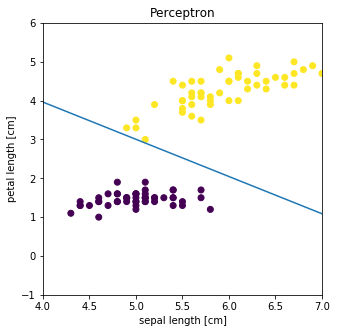

In [13]:
import pandas as pd

df = pd.read_csv('Dane/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

ppn = Perceptron(epochs=20, eta=0.15)
ppn.train(X, y)

# Wielowarstwowa sieć neuronowa

(*Multilayer perceptron*, *feedforward neural network*)


<img src="Grafika/MLP.jpg" width="700">
Źródło: https://www.intechopen.com/source/html/39071/media/f2.jpg


**Uwaga:** "Input layer" pomimo tego, że ma w nazwie słowo "warstwa", to tak naprawdę to nie jest żadna warstwa sieci... To są po prostu dane wejściowe... Niestety przyjęło się literaturze nazywanie tego w ten sposób, co jest mylące :(


Sieci uczy sie metodą spadku gradientu (pewnymi wariantami tej metody). Uczenie wykorzystuje algorytm **propagacji wsteczej** (https://en.wikipedia.org/wiki/Backpropagation).

<br>

<br>

<br>

**Uwaga!** Sieci neuronowe absolutnie zawsze wymagają zestandaryzowanych danych! Niezależnie od tego czy wykorzystujemy regularyzację czy nie i niezależnie od typu sieci!

<br>

<br>

## Wizualizacja obszarów decyzyjnych w zależności od liczby neuronów

### (sieć jednowarstwowa)

<img src="Grafika/nn-from-scratch-hidden-layer-varying-655x1024.png" width="700">
Źródło: http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-hidden-layer-varying-655x1024.png

<br>

### Fakt matematyczny: jednowarstwową siecią możemy otrzymać dowolny kształt. 

Co z tego wynika? To, że (teoretycznie) zawsze wystarczy sieć jednowarstwowa (odpowiednio duża). W praktyce rzeczywiście z reguły wystarcza jedna warstwa, ale mimo wszystko zawsze warto sprawdzić czy 2 (lub 3) nie zadziałają przypadkiem lepiej. Przy czym jeżeli dla dwóch wartsw jest gorzej, to nie ma sensu sprawdzać dla większej ilości.

In [23]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [25]:
?LinearDiscriminantAnalysis

In [90]:
dataset = np.loadtxt('Dane/pima-indians-diabetes.data', delimiter=",")

X = dataset[:,0:8]
Y = dataset[:,8]

print(X.shape)
print(np.mean(Y))

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


####
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
####


models = [LogisticRegression(),
          DecisionTreeClassifier(),
          SVC(probability=True), 
          LinearDiscriminantAnalysis(), 
          QuadraticDiscriminantAnalysis(), 
          RandomForestClassifier()]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = np.round(y_pred)

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

(768, 8)
0.3489583333333333
Accuracy: 77.95% AUC:  0.8284353193773484
Accuracy: 70.87% AUC:  0.6776704240472355
Accuracy: 76.38% AUC:  0.8345410628019323
Accuracy: 77.17% AUC:  0.8307165861513688
Accuracy: 73.62% AUC:  0.7859634997316157
Accuracy: 70.47% AUC:  0.7807971014492754


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
?MLPClassifier()

Jak widzimy MLP w sklearnie zatrzymuje uczenie na podstawie tego co się dzieje w treningowym! Na to sobie można pozwolić,
gdy pracujemy nad prostym problemem klasyfikacji, gdzie naszymi danymi jest tabelka, bo eksperymenty nie zajmują duzo czasu. Przy bardziej złożonych problemach, podchodzimy do tego inaczej!

In [46]:
model = MLPClassifier((20,10))
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]
predictions = y_pred.round()

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 76.38% AUC:  0.823738593666


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [30]:
# Wczytaj dane treningowe i testowe

import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()



dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


(30162, 41)


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:48: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


(15060, 41)

Sprawdźmy wyniki na surowych danych.

In [31]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [33]:
params = {"hidden_layer_sizes": [(5),(10),(15),(30),(50),(100),(250),(500),(750),(1000),(2000)]}

nnet = MLPClassifier(activation="tanh",early_stopping=True,validation_fraction=0.15,max_iter=1000)
gs = GridSearchCV(cv=ShuffleSplit(n_splits=1,test_size=0.1),error_score="accuracy",estimator=nnet,param_grid=params)
gs.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=None, test_size=0.1, train_size=None),
       error_score='accuracy',
       estimator=MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.15, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [5, 10, 15, 30, 50, 100, 250, 500, 750, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
gs.cv_results_

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'mean_fit_time': array([ 2.01808119,  2.92763948,  1.95901299,  5.88557649,  4.03089452,
         8.17512083, 11.45967126, 41.7235229 , 36.73673391, 92.48016906,
        59.6756742 ]),
 'mean_score_time': array([0.00186992, 0.00318456, 0.00294328, 0.00632882, 0.00719261,
        0.01252627, 0.03034401, 0.05205369, 0.11185217, 0.1069715 ,
        0.23668957]),
 'mean_test_score': array([0.84653629, 0.8531654 , 0.85117667, 0.85415976, 0.84819357,
        0.85415976, 0.85250249, 0.85382831, 0.84852502, 0.85515413,
        0.84587338]),
 'mean_train_score': array([0.84910665, 0.8530116 , 0.85050654, 0.86001105, 0.85330632,
        0.85721127, 0.85201695, 0.86045312, 0.851317  , 0.85625345,
        0.84726469]),
 'param_hidden_layer_sizes': masked_array(data=[5, 10, 15, 30, 50, 100, 250, 500, 750, 1000, 2000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),
 'params': [

In [51]:
accuracy_score(gs.best_estimator_.predict(X_test),y_test)

0.83074369189907038

### A teraz tak jak się powinno - na wystandaryzowanych.

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
params = {"hidden_layer_sizes": [(5),(10),(15),(30),(50),(100),(250),(500),(750),(1000),(2000),(3000)]}

nnet = MLPClassifier(activation="tanh",early_stopping=True,validation_fraction=0.15,max_iter=1000)
gs = GridSearchCV(cv=ShuffleSplit(n_splits=1,test_size=0.15),error_score="accuracy",estimator=nnet,param_grid=params)
gs.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=None, test_size=0.15, train_size=None),
       error_score='accuracy',
       estimator=MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.15,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [5, 10, 15, 30, 50, 100, 250, 500, 750, 1000, 2000, 3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
gs.grid_scores_

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.84597, std: 0.00000, params: {'hidden_layer_sizes': 5},
 mean: 0.84906, std: 0.00000, params: {'hidden_layer_sizes': 10},
 mean: 0.84729, std: 0.00000, params: {'hidden_layer_sizes': 15},
 mean: 0.84729, std: 0.00000, params: {'hidden_layer_sizes': 30},
 mean: 0.84729, std: 0.00000, params: {'hidden_layer_sizes': 50},
 mean: 0.84729, std: 0.00000, params: {'hidden_layer_sizes': 100},
 mean: 0.84906, std: 0.00000, params: {'hidden_layer_sizes': 250},
 mean: 0.84530, std: 0.00000, params: {'hidden_layer_sizes': 500},
 mean: 0.84619, std: 0.00000, params: {'hidden_layer_sizes': 750},
 mean: 0.84685, std: 0.00000, params: {'hidden_layer_sizes': 1000},
 mean: 0.83823, std: 0.00000, params: {'hidden_layer_sizes': 2000},
 mean: 0.84884, std: 0.00000, params: {'hidden_layer_sizes': 3000}]

In [56]:
accuracy_score(gs.best_estimator_.predict(X_test),y_test)

0.84588313413014604

In [19]:
import keras

# Keras

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [102]:
model = Sequential()

In [103]:
model.add(Dense(100,activation="sigmoid",input_shape=(X.shape[1],)))

In [104]:
model.add(Dense(50,activation="sigmoid"))

In [105]:
model.add(Dense(10,activation="sigmoid"))

In [106]:
model.add(Dense(1,activation="sigmoid"))

In [107]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_30 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 6,471
Trainable params: 6,471
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [113]:
model.fit(X_train,y_train,batch_size=32,epochs=50,initial_epoch=30)

Epoch 31/50
514/514 [==============================] - 0s 102us/step - loss: 0.4634 - acc: 0.7763
Epoch 32/50
514/514 [==============================] - 0s 134us/step - loss: 0.4605 - acc: 0.7704
Epoch 33/50
514/514 [==============================] - 0s 87us/step - loss: 0.4608 - acc: 0.7665
Epoch 34/50
514/514 [==============================] - 0s 123us/step - loss: 0.4595 - acc: 0.7704
Epoch 35/50
514/514 [==============================] - 0s 136us/step - loss: 0.4605 - acc: 0.7724

In [118]:
model.predict(X_test)

array([[0.05601134],
       [0.7725957 ],
       [0.73465014],
       [0.08275977],
       [0.5122008 ],
       [0.5686697 ],
       [0.06430076],
       [0.35539806],
       [0.78452116],
       [0.10250247],
       [0.7802958 ],
       [0.06215364],
       [0.7513312 ],
       [0.77202237],
       [0.5170231 ],
       [0.12746552],
       [0.25372684],
       [0.18942524],
       [0.08372889],
       [0.26982772],
       [0.48560315],
       [0.22771391],
       [0.7478473 ],
       [0.6298481 ],
       [0.13611597],
       [0.11709224],
       [0.05723199],
       [0.5633265 ],
       [0.19304739],
       [0.39233786],
       [0.5333742 ],
       [0.28081065],
       [0.11159143],
       [0.6915605 ],
       [0.03773841],
       [0.11457501],
       [0.40569267],
       [0.162352  ],
       [0.71364725],
       [0.73424137],
       [0.7016517 ],
       [0.6973858 ],
       [0.3823198 ],
       [0.03589741],
       [0.23712586],
       [0.15280889],
       [0.64810675],
       [0.227

In [117]:
model.evaluate(X_test,y_test)

254/254 [==============================] - 0s 420us/step


[0.4900693109655005, 0.7637795299056946]

In [123]:
?Dense

In [124]:
from keras.regularizers import l2

In [125]:
?l2

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [142]:
?ModelCheckpoint

In [17]:
from keras.layers import Dropout
?Dense

Object `Dense` not found.


In [154]:
model = Sequential()
model.add(Dense(5,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dropout(1))
model.add(Dense(1,activation="sigmoid"))
model.add(Dropout(1))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

early_stopping = EarlyStopping(patience=3)
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)

model.fit(X_train,y_train, 
          batch_size=32, 
          validation_split=0.3,
          epochs=100,
          callbacks=[early_stopping,save_best_model])


model.load_weights("wagi_best.h5py")
model.evaluate(X_test,y_test)

Train on 359 samples, validate on 155 samples
Epoch 1/100
359/359 [==============================] - 1s 3ms/step - loss: 0.7241 - acc: 0.5877 - val_loss: 0.7396 - val_acc: 0.5419
Epoch 2/100
359/359 [==============================] - 0s 94us/step - loss: 0.7150 - acc: 0.5989 - val_loss: 0.7285 - val_acc: 0.5484
Epoch 3/100
359/359 [==============================] - 0s 157us/step - loss: 0.7067 - acc: 0.6100 - val_loss: 0.7181 - val_acc: 0.5484
Epoch 4/100
359/359 [==============================] - 0s 135us/step - loss: 0.6989 - acc: 0.6100 - val_loss: 0.7089 - val_acc: 0.5548
Epoch 5/100
359/359 [==============================] - 0s 169us/step - loss: 0.6917 - acc: 0.6156 - val_loss: 0.7003 - val_acc: 0.5677
Epoch 6/100
359/359 [==============================] - 0s 189us/step - loss: 0.6852 - acc: 0.6100 -

[0.5270465971447351, 0.712598427074162]

### Cwiczenie

Zaimplementuj funkcję `construct_mlp(layer_sizes, input_shape, add_dropout, dropout_rate, compile=False)`, która zwraca kerasowy model, gdzie:
- `layer_sizes` - krotka rozmiarow kolejnych warstw dense,
- `input_shape` - ksztalt danych wejsciowych
- `add_dropout` - jeśli `True`, to po każdej warstwie dense w sieci umieszcamy dropout
- `dropout_rate` - stopien ewentualnego dropoutu
- `compile` - jeśli `True`, to zwracamy skompilowany model

In [ ]:
def construct_mlp(layer_sizes, input_shape, add_dropout, dropout_rate, compile=False):

    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(input_shape,)))
    for ls in layer_sizes[1:]:
        if add_dropout:
            model.add(Dropout(dropout_rate))
        model.add(Dense(ls, activation='relu'))

    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    if compile:
        model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

    return model

# Uwaga

W różnych materiałach możemy sie spotkać z takim kodem. 

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

scores = model.evaluate(X_test, y_test)

<br>

<br>

<br>

<br>

<br>

<br>

<br>

Takie coś nie ma prawa pojawić się w poprawnym modelowaniu, bo:

1. W czasie uczenia wykorzystujemy zbiór testowy (jako walidacyjny) - nie daje to rzetelnej oceny jakości modelu.
2. Liczba epok jest ustalona.


<br>

<br>

<br>


In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='train',categories=['sci.crypt',
 'sci.electronics'])

X = newsgroups.data
y = newsgroups.target

len(X)

1186

In [2]:
from keras.utils import np_utils
y = np_utils.to_categorical(y)
y[:10]

Using TensorFlow backend.


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [3]:
import nltk
import string
import re

In [4]:
def extract_content(mail):    
    # wyciagniecie tresci maila   
    return mail[mail.find("\n\n"):]

def extract_subject(mail):
    return re.findall(r'Subject:(.+)',mail)[0]


def stem_helper(word,stemmer):
    try:
        y = stemmer.stem(word)
    except:
        y = word
    return y



def clean_text(x, stemmer = nltk.PorterStemmer()):   
    """
    x - jeden mail
    """    
 
    #tokenizacja - rozbicie na liste tokenow
    x_t = nltk.word_tokenize(x)    
    # usuwanie znakow interpunkcyjnych
    translator = str.maketrans('', '', string.punctuation)
    x_t = [word.translate(translator) for word in x_t]    
    # zamina liter male
    x_t = [word.lower() for word in x_t]    
    # usuwanie zbednych tokenow
    x_t = [w for w in x_t if w not in nltk.corpus.stopwords.words("english")+["nt"]]    
    # stemming
    x_t = [stem_helper(word,stemmer) for word in x_t]    
    # sklejenie do napisu
    x_new = ' '.join(x_t)    
    return x_new


In [5]:
X_c = [clean_text(extract_content(x)) for x in X]
X_s = [clean_text(extract_subject(x)) for x in X]

In [10]:
X = pd.DataFrame({"subject":X_s, "content":X_c})

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c,y,test_size=400)
#bierzemy tylko tresc - bez tytulu

In [12]:
len(X_train)

786

In [24]:
cv =CountVectorizer(max_features=2000)

cv.fit(X_train,y_train)

X_train_transformed = cv.transform(X_train).todense()
X_test_transformed = cv.transform(X_test).todense()

In [25]:
X_test_transformed.shape, y_test.shape

((400, 2000), (400, 2))

In [26]:
model = Sequential()
model.add(Dense(100,activation="relu",input_shape=(X_train_transformed.shape[1],),kernel_regularizer=l2(0.1)))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])

early_stopping = EarlyStopping(patience=3)
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)

model.fit(X_train_transformed,y_train, 
          batch_size=32, 
          validation_split=0.3,
          epochs=100,
          callbacks=[early_stopping,save_best_model])


model.load_weights("wagi_best.h5py")
model.evaluate(X_test_transformed, y_test)

Train on 550 samples, validate on 236 samples
Epoch 1/100
550/550 [==============================] - 1s 1ms/step - loss: 13.2234 - categorical_accuracy: 0.6564 - val_loss: 7.0824 - val_categorical_accuracy: 0.9110
Epoch 2/100
550/550 [==============================] - 0s 499us/step - loss: 4.4101 - categorical_accuracy: 0.9236 - val_loss: 2.1765 - val_categorical_accuracy: 0.9449

[0.3016233968734741, 0.935]